<a href="https://colab.research.google.com/github/AnabelBerumen/100DaysOfCode/blob/main/estad%C3%ADstica/Clustering_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering en vinos



In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

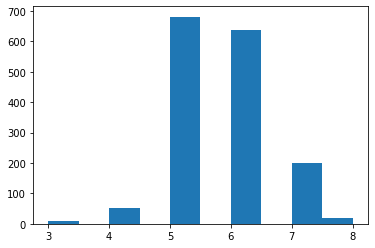

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['quality'])

In [ ]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos - tipificación

In [ ]:
# (x - x min) / (x max - x min)
df_norm = (df-df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jeárquico con scikit-learn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clus = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

In [ ]:
etiquetas = pd.Series(clus.labels_)
etiquetas[:10]

0    2
1    2
2    2
3    3
4    2
5    2
6    2
7    2
8    2
9    1
dtype: int64

Text(0, 0.5, 'Num. de vinos del cluster')

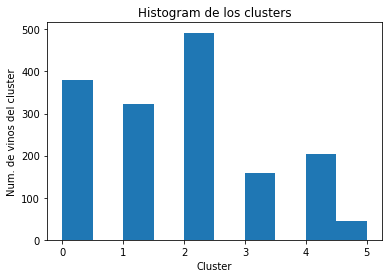

In [ ]:
plt.hist(etiquetas)
plt.title('Histogram de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Num. de vinos del cluster')

In [ ]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(df_norm, 'ward')

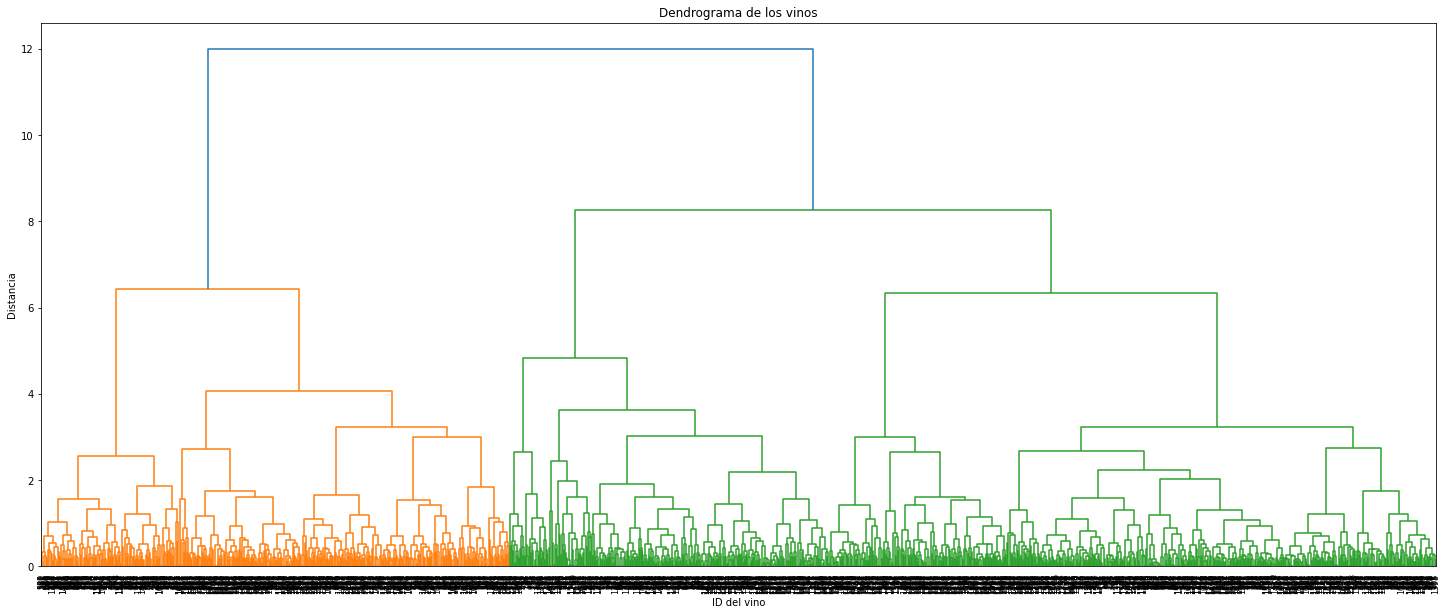

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90.,
          leaf_font_size=8.)
plt.show()

## Clustering con k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [ ]:
model.labels_

array([1, 1, 1, ..., 5, 5, 4], dtype=int32)

In [ ]:
etiquetas_km = pd.Series(model.labels_)

In [ ]:
df_norm['cluster_h'] = etiquetas
df_norm['cluster_km'] = etiquetas_km

In [ ]:
df_norm.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_km
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,2,1
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,2,1
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,2,5
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,2,1
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,1,3


(array([ 29.,   0., 506.,   0., 245.,   0., 319.,   0., 269., 231.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

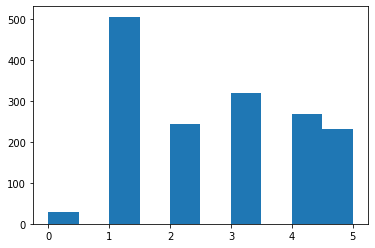

In [ ]:
plt.hist(etiquetas_km)

In [ ]:
# podemos obtener los centroides del modelo
model.cluster_centers_

array([[0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.26412256, 0.35962288, 0.1233004 , 0.09144377, 0.12285957,
        0.14394867, 0.10748055, 0.49223706, 0.48607264, 0.15530993,
        0.21981859, 0.43992095],
       [0.58305942, 0.2075622 , 0.50926531, 0.13245737, 0.1311233 ,
        0.1350388 , 0.09061801, 0.65662142, 0.33058011, 0.22260785,
        0.28814233, 0.5444898 ],
       [0.31575443, 0.27760124, 0.30244514, 0.15143642, 0.12675253,
        0.38131926, 0.2969084 , 0.53831034, 0.43716832, 0.17881478,
        0.21464512, 0.45579937],
       [0.36747047, 0.15762336, 0.42561338, 0.10622804, 0.10607518,
        0.16545369, 0.0850421 , 0.4175278 , 0.41884495, 0.23887541,
        0.48332857, 0.69516729],
       [0.17622495, 0.32307419, 0.09099567, 0.09405207, 0.09635106,
        0.24559478, 0.12269591, 0.32471029, 0.57654157, 0.18433263,
        0.48773449,

In [ ]:
model.inertia_

186.5617174935194

### Interpretación total

In [ ]:
df_norm.groupby('cluster_km').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_km,,,,,,,,,,,,,
0,0.329875,0.284128,0.487586,0.074162,0.549537,0.213696,0.211405,0.512406,0.234863,0.592814,0.161273,0.468966,4.896552
1,0.264123,0.359623,0.123300,0.091444,0.122860,0.143949,0.107481,0.492237,0.486073,0.155310,0.219819,0.439921,2.009881
2,0.583059,0.207562,0.509265,0.132457,0.131123,0.135039,0.090618,0.656621,0.330580,0.222608,0.288142,0.544490,2.081633
3,0.315754,0.277601,0.302445,0.151436,0.126753,0.381319,0.296908,0.538310,0.437168,0.178815,0.214645,0.455799,1.053292
4,0.367470,0.157623,0.425613,0.106228,0.106075,0.165454,0.085042,0.417528,0.418845,0.238875,0.483329,0.695167,0.107807
5,0.176225,0.323074,0.090996,0.094052,0.096351,0.245595,0.122696,0.324710,0.576542,0.184333,0.487734,0.610390,3.385281


In [ ]:
df_norm.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster_h,cluster_km
quality,,,,,,,,,,,,,
0.0,0.332743,0.523630,0.171000,0.118836,0.184474,0.140845,0.066784,0.542878,0.518110,0.143713,0.239231,1.700000,1.400000
0.2,0.281349,0.393125,0.174151,0.122900,0.131351,0.158650,0.106874,0.475217,0.505126,0.159530,0.286938,1.981132,1.547170
0.4,0.315686,0.313042,0.243686,0.111565,0.134784,0.225125,0.178495,0.516419,0.444841,0.174233,0.230724,1.879589,1.986784
0.6,0.331609,0.258551,0.273824,0.108027,0.121797,0.207206,0.123215,0.480548,0.455175,0.206784,0.343003,1.874608,2.992163
0.8,0.378085,0.194465,0.375176,0.124699,0.107826,0.183736,0.102545,0.443045,0.433664,0.246261,0.471679,0.984925,3.778894
1.0,0.351032,0.207763,0.391111,0.114916,0.094231,0.172926,0.096977,0.377549,0.415136,0.262142,0.568376,1.222222,4.111111
